### les librairies python utilisés

In [3]:
import os
import tweepy as tw
import pandas as pd
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

### Access key Twitter

In [4]:
consumer_key = 'dzGNau17lTYcL355HUF7KQZvn'
consumer_secret = 'S7UTCGHVWrYgw8JFok9MFgS0qlL9tXEQHSKzi4GoOvXBIqv3ci'
access_token_key = '1315409440657551366-6KdwPAKpt3utvMQXkqCQzQBg7J26ht'
access_token_secret = '73XYbZUP8571UZIfXia33YzhnPQSGuWaF1xGQOSA6u1AV'

In [7]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)

api = tw.API(auth, wait_on_rate_limit=True)

### Avis sur Trump 

In [8]:
search_word = "#Trump"
date_since = '2020-06-01'

In [9]:
Tweets_Trump = tw.Cursor(api.search, q = search_word, lang = 'en', since = date_since).items(1000)

In [10]:
Tweets_Trump = [[tweet.text]for tweet in Tweets_Trump]
Tweets_Trump

[['RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…'],
 ['RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…'],
 ['RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…'],
 ['RT @jmil400: @abcnews The problem with these blokes is, that because they appear regularly on our TV screens, there is an inference that th…'],
 ['RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…'],
 ['RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…'],
 ['RT @JRussBriley: Visions of New Worlds, Both Hopeful and Nightmarish https://t.co/HDUENecM9o via @nytimesbooks #not

In [256]:
Trump_df = pd.DataFrame(data=Tweets_Trump, columns=['Text'])
pd.set_option('max_colwidth', 1000)
Trump_df.head()

,Text
0,"RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…"
1,"RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…"
2,"RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…"
3,"RT @jmil400: @abcnews The problem with these blokes is, that because they appear regularly on our TV screens, there is an inference that th…"
4,"RT @Jeff_Paul: Thousands of people left out in the cold and stranded in #Omaha, #Nebraska after a #Trump rally. I’m told the shuttles aren’…"


### Avis sur Biden

In [12]:
search_word = "#Biden"
date_since = '2020-06-01'

In [13]:
Tweets_Biden = tw.Cursor(api.search, q = search_word, lang = 'en', since = date_since).items(1000)

In [14]:
Tweets_Biden = [[tweet.text]for tweet in Tweets_Biden]
Tweets_Biden

[['RT @TheDailyEdge: The tax cuts failed.\n\nThe debt is $27 trillion.\n\nThe economy is in tatters.\n\nTrump has FAILED bigly.\n\n#Biden will be bett…'],
 ["@PatinWA135 @aspenaidan @realJamesKlug @AnnCoulter I voted twice for the nation's 1st Black president (I wept, I wa… https://t.co/YKW2hnOedL"],
 ['RT @JournalistJG: @johncusack Good news! \n\nBut Dems are walking into electoral ambush!\n \n#Biden needs to urge voters with mail-ins to #Vote…'],
 ['Dow futures sink 500 points as Wall Street grapples with rising Covid cases - #Biden #Harris #Trump #Pence #GOP… https://t.co/X5xFI5IMVp'],
 ['John 3:16 For God so loved the world that He gave His only begotten Son(#JesusChrist)that whosoever believeth in Hi… https://t.co/KXKIME9qib'],
 ['RT @sjtrades34: https://t.co/X4jl64kng8\n\nEveryone needs to watch this interview. This is a potential future president. and his family. and…'],
 ["Federal data from the second quarter also shows Marylanders gave significantly more to Biden's campaign th

In [202]:
Biden_df = pd.DataFrame(data=Tweets_Biden, columns=['Text'])
pd.set_option('max_colwidth', 1000)
Biden_df.head()

,Text
0,RT @TheDailyEdge: The tax cuts failed.\n\nThe debt is $27 trillion.\n\nThe economy is in tatters.\n\nTrump has FAILED bigly.\n\n#Biden will be bett…
1,"@PatinWA135 @aspenaidan @realJamesKlug @AnnCoulter I voted twice for the nation's 1st Black president (I wept, I wa… https://t.co/YKW2hnOedL"
2,RT @JournalistJG: @johncusack Good news! \n\nBut Dems are walking into electoral ambush!\n \n#Biden needs to urge voters with mail-ins to #Vote…
3,Dow futures sink 500 points as Wall Street grapples with rising Covid cases - #Biden #Harris #Trump #Pence #GOP… https://t.co/X5xFI5IMVp
4,John 3:16 For God so loved the world that He gave His only begotten Son(#JesusChrist)that whosoever believeth in Hi… https://t.co/KXKIME9qib


### Avis sur USA Election

In [16]:
search_word = "#USA Election"
date_since = '2020-06-01'

In [17]:
Tweets_USA_Election = tw.Cursor(api.search, q = search_word, lang = 'en', since = date_since).items(1000)

In [18]:
Tweets_USA_Election = [[tweet.text]for tweet in Tweets_USA_Election]
Tweets_USA_Election

[['RT @boomlive_in: Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on November 3. BO…'],
 ['Will you strive for justice and peace among all people, and respect the dignity\nof every human being? #jaxcathedral… https://t.co/QOGajyL5LU'],
 ['Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on Novembe… https://t.co/MzpU8XY0ut'],
 ['@realDonaldTrump WAKE UP WORLD!!! ARMENIA BOMBED BARDA CITY OF AZERBAIJAN! SIX TIMES!!! SIX! SIX!! IT IS UNACCEPTAB… https://t.co/PlXVfhtIzR'],
 ['@realDonaldTrump Armenian terrorists fired a rocket at the Azerbaijani city of Barda, according to preliminary repo… https://t.co/Q8kzAunvVD'],
 ['#USA #ElectionDay 2020 #American voters make history in early voting; more than 70 million cast ballots\r\n\nhttps://t.co/Df2nrtnn6E'],
 ['@thedailybeast "#Melania #Trump accused Democrats of setting a bad example: \'#children watching and learning about… https

In [19]:
USA_Election_df = pd.DataFrame(data=Tweets_USA_Election, columns=['text'])
pd.set_option('max_colwidth', 1500)
USA_Election_df.head()

,text
0,"RT @boomlive_in: Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on November 3. BO…"
1,"Will you strive for justice and peace among all people, and respect the dignity\nof every human being? #jaxcathedral… https://t.co/QOGajyL5LU"
2,"Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on Novembe… https://t.co/MzpU8XY0ut"
3,@realDonaldTrump WAKE UP WORLD!!! ARMENIA BOMBED BARDA CITY OF AZERBAIJAN! SIX TIMES!!! SIX! SIX!! IT IS UNACCEPTAB… https://t.co/PlXVfhtIzR
4,"@realDonaldTrump Armenian terrorists fired a rocket at the Azerbaijani city of Barda, according to preliminary repo… https://t.co/Q8kzAunvVD"


### Avis sur VoteBidenHarris

In [20]:
search_word = "#VoteBidenHarris2020"
date_since = '2020-06-01'

In [21]:
Tweets_Vote_Biden = tw.Cursor(api.search, q = search_word, lang = 'en', since = date_since).items(1000)

In [22]:
Tweets_Vote_Biden = [[tweet.user.screen_name, tweet.text, tweet.created_at, tweet.user.location]for tweet in Tweets_Vote_Biden]
Tweets_Vote_Biden

[['mrmurray1029',
  'RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…',
  datetime.datetime(2020, 10, 28, 12, 3, 23),
  ''],
 ['MaryGeise',
  'RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…',
  datetime.datetime(2020, 10, 28, 12, 3, 18),
  'New Jersey, USA'],
 ['gadgetguymn',
  'RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…',
  datetime.datetime(2020, 10, 28, 12, 3, 5),
  'Minneapolis, Minnesota, USA'],
 ['_nik_nik_b',
  '@JoeBiden My President 💙🙏🏾✊🏾🇺🇲 #VoteBidenHarris2020 💙💙🙏🏾🙏🏾✊🏾✊🏾🇺🇲🇺🇲',
  datetime.datetime(2020, 10, 28, 12, 2, 55),
  'Alabama, USA'],
 ['4Tchat',
  "RT @MaisonDeUnicorn: @JoeBiden A real leaders statement. A real leader with a proven track record of having ALL of America's back. Not just…",
 

In [23]:
Vote_Biden_df = pd.DataFrame(data=Tweets_Vote_Biden, columns=['UserName', 'Text', 'Created_At', 'Location'])
pd.set_option('max_colwidth', 1000)
Vote_Biden_df.head()

,UserName,Text,Created_At,Location
0,mrmurray1029,RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…,2020-10-28 12:03:23,
1,MaryGeise,RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…,2020-10-28 12:03:18,"New Jersey, USA"
2,gadgetguymn,RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…,2020-10-28 12:03:05,"Minneapolis, Minnesota, USA"
3,_nik_nik_b,@JoeBiden My President 💙🙏🏾✊🏾🇺🇲 #VoteBidenHarris2020 💙💙🙏🏾🙏🏾✊🏾✊🏾🇺🇲🇺🇲,2020-10-28 12:02:55,"Alabama, USA"
4,4Tchat,RT @MaisonDeUnicorn: @JoeBiden A real leaders statement. A real leader with a proven track record of having ALL of America's back. Not just…,2020-10-28 12:02:53,Belgium 🇧🇪🇪🇺


### Avis sur VoteDonaldTrump

In [31]:
search_word = "#VoteDonaldTrump2020"
date_since = '2020-06-01'

In [32]:
Tweets_Vote_Trump = tw.Cursor(api.search, q = search_word, lang = 'en', since = date_since).items(1000)

In [33]:
Tweets_Vote_Trump = [[tweet.user.screen_name, tweet.text, tweet.created_at, tweet.user.location]for tweet in Tweets_Vote_Trump]
Tweets_Vote_Trump

[['kimspence',
  'Fact Check: 19 False Claims in Barack Obama‘s Speech for Joe Biden in Florida #VoteDonaldTrump2020… https://t.co/g7g5FfFcGG',
  datetime.datetime(2020, 10, 28, 5, 29, 4),
  'Los Angeles'],
 ['Kruisin4Potus',
  'JOE BIDEN DESTROYED THE USA #ListenToThePresident #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica… https://t.co/BUYf4QzadT',
  datetime.datetime(2020, 10, 28, 2, 17, 35),
  ''],
 ['Kruisin4Potus',
  'CAUSE THE MAN CARES #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica #VoteDonaldTrump2020 https://t.co/iDTiHTSmZk',
  datetime.datetime(2020, 10, 28, 0, 21, 13),
  ''],
 ['NJGirlinFLSun',
  '⬇️ #SaveNYC  ...\nstop suppressing the Jewish ... They are a staple for years in NYC\n#vote\n#VoteRedToSaveAmerica… https://t.co/Q8dQmvkZGX',
  datetime.datetime(2020, 10, 27, 22, 26, 19),
  'Mandarin, FL 🇺🇸 ☀️'],
 ['kimspence',
  "Trump destroys Biden by using Biden's own words! Brilliant. #VoteDonaldTrump2020 #AmericaFirst \nhttps://t.co/WZ2s8TJGMz",
  datetime.dat

In [34]:
Vote_Trump_df = pd.DataFrame(data=Tweets_Vote_Trump, columns=['UserName', 'Text', 'Created_At', 'Location'])
pd.set_option('max_colwidth', 1500)
Vote_Trump_df.head()

,UserName,Text,Created_At,Location
0,kimspence,Fact Check: 19 False Claims in Barack Obama‘s Speech for Joe Biden in Florida #VoteDonaldTrump2020… https://t.co/g7g5FfFcGG,2020-10-28 05:29:04,Los Angeles
1,Kruisin4Potus,JOE BIDEN DESTROYED THE USA #ListenToThePresident #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica… https://t.co/BUYf4QzadT,2020-10-28 02:17:35,
2,Kruisin4Potus,CAUSE THE MAN CARES #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica #VoteDonaldTrump2020 https://t.co/iDTiHTSmZk,2020-10-28 00:21:13,
3,NJGirlinFLSun,⬇️ #SaveNYC ...\nstop suppressing the Jewish ... They are a staple for years in NYC\n#vote\n#VoteRedToSaveAmerica… https://t.co/Q8dQmvkZGX,2020-10-27 22:26:19,"Mandarin, FL 🇺🇸 ☀️"
4,kimspence,Trump destroys Biden by using Biden's own words! Brilliant. #VoteDonaldTrump2020 #AmericaFirst \nhttps://t.co/WZ2s8TJGMz,2020-10-27 22:24:06,Los Angeles


In [389]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 're', 'http', 'https', 'pm', 'co', 'ask', 'hqbytey', 'fro', 'co',  'else', 'get',
                   'fffcgg', 'qgjkkkm', 'rt', 'end', 'hqbytey', 'mog', 'npvc', 'maga', 'click', 'pre', 'co', 'way', 'pr', 'pub', 'amp', 'solo', 
                   'even', 'see', 'wedding', 'anniversary', 'set', 'child', 'plxvfhtizr', 'https_co', 'eiypn', 'ydq', 'no', 'hone', 'line', 'week',
                   'd', 'amp', 'typo', 'key', 'dem', 'csdrmy', 'messy', 'foxc', 'acre', 'fthjqtqiqx', 'cat', 'say', 'gop'])

## Import DataSet qui contient des tweets sur DoanldTrump 2020
Premièrement on a travaille sur une dataset que je collecte les réponses sur les tweets récents de Donald Trump 

In [390]:
DataFrameTrump.head()

,Text
0,Fact Check: 19 False Claims in Barack Obama‘s Speech for Joe Biden in Florida #VoteDonaldTrump2020… https://t.co/g7g5FfFcGG
1,JOE BIDEN DESTROYED THE USA #ListenToThePresident #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica… https://t.co/BUYf4QzadT
2,CAUSE THE MAN CARES #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica #VoteDonaldTrump2020 https://t.co/iDTiHTSmZk
3,⬇️ #SaveNYC ...\nstop suppressing the Jewish ... They are a staple for years in NYC\n#vote\n#VoteRedToSaveAmerica… https://t.co/Q8dQmvkZGX
4,Trump destroys Biden by using Biden's own words! Brilliant. #VoteDonaldTrump2020 #AmericaFirst \nhttps://t.co/WZ2s8TJGMz


### Remove emails and newline characters

In [391]:
# Convert to list
data = DataFrameTrump.Text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Fact Check: 19 False Claims in Barack Obama‘s Speech for Joe Biden in '
 'Florida #VoteDonaldTrump2020… https://t.co/g7g5FfFcGG']


Après avoir supprimé les e-mails et les espaces supplémentaires, le texte semble toujours désordonné. Il n'est pas prêt pour le LDA à consommer. Vous devez décomposer chaque phrase en une liste de mots grâce à la tokenisation, tout en clarifiant tout le texte en désordre dans le processus.

In [392]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['fact', 'check', 'false', 'claims', 'in', 'barack', 'obama', 'speech', 'for', 'joe', 'biden', 'in', 'florida', 'votedonaldtrump', 'https', 'co', 'fffcgg']]


Le modèle des bigrammes est prêt. Définissons les fonctions pour supprimer les mots vides, créer des bigrammes et de la lemmatisation et les appeler séquentiellement.

In [393]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10000) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10000)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[100]]])

['crimes', 'against', 'humanity', 'trump', 'gop', 'covidiots', 'superspreaders']


In [394]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [395]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['fact', 'check', 'false', 'claim', 'barack', 'votedonaldtrump']]


Créer le dictionnaire et le corpus nécessaires à la Topic Modeling Les deux principales entrées du topic model LDA sont le dictionnaire (id2word) et le corpus.

In [396]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [397]:
id2word[0]

'barack'

In [398]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('barack', 1),
  ('check', 1),
  ('claim', 1),
  ('fact', 1),
  ('false', 1),
  ('votedonaldtrump', 1)]]

Nous avons tout ce qu'il faut pour former le modèle LDA. En plus du corpus et du dictionnaire, vous devez également fournir le nombre de sujets.

In [399]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=1000,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Le modèle LDA ci-dessus est construit avec 20 sujets différents où chaque sujet est une combinaison de mots-clés et chaque mot-clé apporte un certain poids au sujet. Vous pouvez voir les mots-clés pour chaque sujet et la pondération (importance) de chaque mot-clé en utilisant lda_model.print_topics () comme indiqué ci-dessous.

In [400]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"trump" + 0.020*"deal" + 0.016*"make" + 0.012*"son" + 0.012*"retire" '
  '+ 0.012*"obvious" + 0.012*"ill" + 0.008*"know" + 0.008*"medium" + '
  '0.008*"want"'),
 (1,
  '0.343*"trump" + 0.147*"see" + 0.134*"instead" + 0.013*"never" + '
  '0.012*"anti" + 0.010*"peop" + 0.010*"establishment" + 0.010*"expose" + '
  '0.006*"great" + 0.005*"trumpislose"'),
 (2,
  '0.114*"would" + 0.105*"big" + 0.103*"money" + 0.102*"feel" + '
  '0.102*"operation" + 0.101*"laundering" + 0.100*"target" + '
  '0.100*"obamaadmin" + 0.005*"weak" + 0.002*"acre"'),
 (3,
  '0.049*"trump" + 0.036*"want" + 0.021*"know" + 0.021*"back" + 0.018*"time" + '
  '0.015*"family" + 0.015*"case" + 0.015*"spike" + 0.015*"expert" + '
  '0.012*"life"'),
 (4,
  '0.183*"campaign" + 0.092*"claim" + 0.091*"appear" + 0.091*"website" + '
  '0.091*"hack" + 0.090*"scam" + 0.090*"blackmailish" + 0.084*"sign" + '
  '0.003*"work" + 0.002*"screen"'),
 (5,
  '0.073*"run" + 0.048*"call" + 0.040*"blame" + 0.040*"try" + 0.034*"push" 

Le sujet 7 est représenté par ('0.206*"election" + 0.198*"trump" + 0.148*"compromise" + 0.010*"covid" + '
  '0.008*"jealous" + 0.008*"laugh" + 0.008*"medium" + 0.008*"pg" + ''0.008*"coverage" + 0.008*"already"') 
Cela signifie que les 10 principaux mots clés qui contribuent à ce sujet sont: "trump", "election", "compromise", etc. En regardant ces mots clés, 
pouvez-vous deviner ce que pourrait être ce sujet? Vous pouvez résumer cela par «Trump»

    
La Perplexity du modèle et la Coherence du sujet fournissent une mesure pratique pour juger de la qualité d'un modèle de sujet donné.

In [401]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.915102795454604

Coherence Score:  0.3800695216486146


In [402]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.492738 -0.045653       1        1  38.262543
19     0.043816 -0.255191       2        1  13.929805
9     -0.016210 -0.006242       3        1   3.667757
10    -0.077655  0.009274       4        1   3.559851
2      0.142350  0.168358       5        1   3.386590
1     -0.028493 -0.195136       6        1   3.330583
5     -0.058342  0.090491       7        1   3.301415
14    -0.069367  0.039956       8        1   3.273224
18     0.099146 -0.000539       9        1   3.209552
6     -0.050090  0.005251      10        1   3.151689
3     -0.083124 -0.004603      11        1   3.051448
4      0.128957  0.186927      12        1   2.670904
11    -0.080070  0.011518      13        1   2.316070
7     -0.023270 -0.157875      14        1   2.253826
13    -0.084216  0.017577      15        1   2.059751
15    -0.005187 -0.022987      16        1   2.044660
0     -0.087465  0.014516      17        1   1.946104
16    -0.075125  0.075405      18        1   1.786611
8     -0.083527  0.033467      19        1   1.611086
12    -0.084864  0.035487      20        1   1.186527, topic_info=           Term        Freq       Total Category  logprob  loglift
65       people  449.000000  449.000000  Default  30.0000  30.0000
20        trump  262.000000  262.000000  Default  29.0000  29.0000
64        leave  395.000000  395.000000  Default  28.0000  28.0000
63         cold  393.000000  393.000000  Default  27.0000  27.0000
67         tell  393.000000  393.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
136       think    0.421966    6.890511  Topic20  -5.2092   1.6412
80         must    0.421963    2.690182  Topic20  -5.2092   2.5817
783  impossible    0.421962    2.082287  Topic20  -5.2092   2.8378
355        make    0.421961    5.585745  Topic20  -5.2092   1.8511
331         guy    0.421960    2.038733  Topic20  -5.2092   2.8590

[816 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
422       8  0.436674    abandon
801      17  0.638944       able
765       8  0.436664     accord
117       1  0.461141         ad
117      17  0.461141         ad
...     ...       ...        ...
17       17  0.159651       year
241      13  0.393021  yesterday
241      18  0.393021  yesterday
589       4  0.587544      youth
1040      7  0.595022       zilb

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 20, 10, 11, 3, 2, 6, 15, 19, 7, 4, 5, 12, 8, 14, 16, 1, 17, 9, 13])

Chaque bulle sur le graphique de gauche représente un sujet. Plus la bulle est grande, plus ce sujet est répandu. D'accord, si vous déplacez le curseur sur l'une des bulles, les mots et les barres sur le côté droit seront mis à jour. Ces mots sont les principaux mots-clés qui forment le sujet sélectionné par exemple Topic 1: contient les mots trump, people, leave, week... on conclure que la population americaine n'ont pas voté pour trump cette fois.
Nous avons réussi à créer un beau modèle de Topic

Premierment on vu la version intégrée de Gensim de l'algorithme LDA, maintement on va améliorer notre modele par La version de Mallet, cependant, donne souvent une meilleure qualité des Topic.

In [403]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:\\users\\asus\\mallet-2.0.8'

mallet_path = 'C:\\users\\asus\\mallet-2.0.8\\bin\\mallet'
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [404]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(17,
  [('shuttle', 0.35379061371841153),
   ('thousand', 0.23826714801444043),
   ('people', 0.148014440433213),
   ('parade', 0.021660649819494584),
   ('experienced', 0.018050541516245487),
   ('happen', 0.018050541516245487),
   ('important', 0.010830324909747292),
   ('violent', 0.010830324909747292),
   ('peop', 0.007220216606498195),
   ('armenian', 0.007220216606498195)]),
 (19,
  [('big', 0.09401709401709402),
   ('feel', 0.0811965811965812),
   ('money', 0.0811965811965812),
   ('operation', 0.0811965811965812),
   ('laundering', 0.07692307692307693),
   ('target', 0.07264957264957266),
   ('obamaadmin', 0.06837606837606838),
   ('lead', 0.02564102564102564),
   ('walk', 0.02564102564102564),
   ('work', 0.021367521367521368)]),
 (11,
  [('people', 0.2968197879858657),
   ('shuttle', 0.21554770318021202),
   ('leave', 0.18021201413427562),
   ('thousand', 0.09187279151943463),
   ('cold', 0.03180212014134275),
   ('presidency', 0.01060070671378092),
   ('persecution', 0.0070

En changeant simplement l'algorithme LDA, nous avons augmenté le score de cohérence de 0,38 à 0,64.

In [405]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [406]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=2)

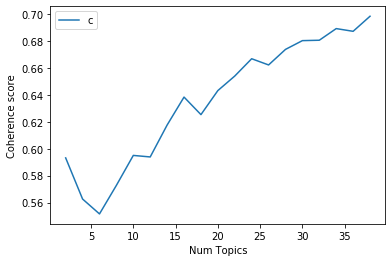

In [407]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [408]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5932
Num Topics = 4  has Coherence Value of 0.5626
Num Topics = 6  has Coherence Value of 0.5515
Num Topics = 8  has Coherence Value of 0.5727
Num Topics = 10  has Coherence Value of 0.595
Num Topics = 12  has Coherence Value of 0.5939
Num Topics = 14  has Coherence Value of 0.6176
Num Topics = 16  has Coherence Value of 0.6384
Num Topics = 18  has Coherence Value of 0.6253
Num Topics = 20  has Coherence Value of 0.6432
Num Topics = 22  has Coherence Value of 0.654
Num Topics = 24  has Coherence Value of 0.6669
Num Topics = 26  has Coherence Value of 0.6623
Num Topics = 28  has Coherence Value of 0.6738
Num Topics = 30  has Coherence Value of 0.6804
Num Topics = 32  has Coherence Value of 0.6807
Num Topics = 34  has Coherence Value of 0.6893
Num Topics = 36  has Coherence Value of 0.6873
Num Topics = 38  has Coherence Value of 0.6985


In [409]:
# Select the model and print the topics
optimal_model = model_list[18]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(29,
  '0.219*"walk" + 0.216*"give" + 0.190*"rally" + 0.178*"video" + 0.168*"end" + '
  '0.003*"omahastranded" + 0.003*"kxna" + 0.003*"corner" + 0.003*"grocery" + '
  '0.003*"uidd"'),
 (22,
  '0.405*"trump" + 0.115*"supporter" + 0.076*"care" + 0.053*"country" + '
  '0.046*"bus" + 0.038*"strand" + 0.023*"reach" + 0.015*"inclined" + '
  '0.015*"change" + 0.008*"jpwdw"'),
 (23,
  '0.397*"thousand" + 0.238*"shuttle" + 0.159*"leave" + 0.033*"biden" + '
  '0.026*"problem" + 0.007*"joke" + 0.007*"favorite" + 0.007*"nebraskan" + '
  '0.007*"bpfvojdhg" + 0.007*"clap"'),
 (19,
  '0.492*"cold" + 0.267*"leave" + 0.058*"shuttle" + 0.025*"bad" + '
  '0.017*"national" + 0.008*"sell" + 0.008*"play" + 0.008*"deface" + '
  '0.008*"celebrity" + 0.008*"depression"'),
 (20,
  '0.455*"people" + 0.277*"cold" + 0.027*"site" + 0.009*"tier" + '
  '0.009*"quickly" + 0.009*"uwyetym" + 0.009*"basically" + 0.009*"undisclose" '
  '+ 0.009*"xfffwd" + 0.009*"nui"'),
 (11,
  '0.238*"cold" + 0.221*"shuttle" + 0.213*"th

In [410]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0493,"trump, make, deal, point, win, perfect, check, son, ill, obvious",Fact Check: 19 False Claims in Barack Obama‘s Speech for Joe Biden in Florida #VoteDonaldTrump2020… https://t.co/g7g5FfFcGG
1,1,7.0,0.0411,"life, medium, people, praise, area, jealous, laugh, pg, divisiveness, health",JOE BIDEN DESTROYED THE USA #ListenToThePresident #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica… https://t.co/BUYf4QzadT
2,2,22.0,0.0421,"trump, supporter, care, country, bus, strand, reach, inclined, change, jpwdw",CAUSE THE MAN CARES #ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica #VoteDonaldTrump2020 https://t.co/iDTiHTSmZk
3,3,3.0,0.0523,"people, thousand, year, night, aexndb, trumpisanat, hoax, division, zd, suspend",⬇️ #SaveNYC ... stop suppressing the Jewish ... They are a staple for years in NYC #vote #VoteRedToSaveAmerica… https://t.co/Q8dQmvkZGX
4,4,7.0,0.0414,"life, medium, people, praise, area, jealous, laugh, pg, divisiveness, health",Trump destroys Biden by using Bidens own words! Brilliant. #VoteDonaldTrump2020 #AmericaFirst https://t.co/WZ2s8TJGMz
5,5,18.0,0.0853,"lie, corrupt, crime, guilty, plagiarise, crook, multiple, forget, ago, fracke",#KamalaHarris in desperate times call for desperate measures? Glad I #WalkAway from a corrupted party 4 years ago… https://t.co/W0WxHWD9bI
6,6,14.0,0.0523,"vote, watch, win, love, voting, child, day, teach, debt, violent",Sen. Kamala Harris (D-CA) has embraced illegal aliens enrolled in the Deferred Action for Childhood Arrivals (DACA)… https://t.co/5i8r76DUlr
7,7,2.0,0.0429,"leave, people, lead, trumpislose, lose, candidate, security, president, word, lhk",#ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica #VoteDonaldTrump2020 LEADING #Florida https://t.co/VYMH1sARMS
8,8,20.0,0.0449,"people, cold, site, tier, quickly, uwyetym, basically, undisclose, xfffwd, nui",#ShutDownTheMobs #ReOpenAmerica #VoteRedToSaveAmerica #VoteDonaldTrump2020 YOU GOT QUESTIONS on the #LaptopFromHell… https://t.co/n6oxMYRRim
9,9,22.0,0.0437,"trump, supporter, care, country, bus, strand, reach, inclined, change, jpwdw","#Democrats dont even know who they up against, and you expect to run a country lol… https://t.co/lUtCxeXV8X"


Parfois, seuls les mots-clés du sujet peuvent ne pas être suffisants pour comprendre en quoi consiste un sujet. Ainsi, pour aider à comprendre le sujet, vous pouvez trouver les documents auxquels un sujet donné a le plus contribué et en déduire le sujet en lisant ce document

In [411]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1420,"trump, make, deal, point, win, perfect, check, son, ill, obvious","RT Its obvious that Justice Kennedy made a deal with #Trump - as in - Ill retire, give up my #SCOTUS seat, so that my son who…"
1,1.0,0.0614,"cold, thousand, opinion, office, stop, hour, shovel, show, screen, die",When you shovel to the bottom of the cesspool keep shoveling because you haven’t reache… https://t.co/d2BVQMn6Vw
2,2.0,0.0656,"leave, people, lead, trumpislose, lose, candidate, security, president, word, lhk",Bunch of Elders put themselves in a bad position for #Trump more than once. I hope they mad enough to rethink… https://t.co/Zew17IUKhZ
3,3.0,0.0523,"people, thousand, year, night, aexndb, trumpisanat, hoax, division, zd, suspend",⬇️ #SaveNYC ... stop suppressing the Jewish ... They are a staple for years in NYC #vote #VoteRedToSaveAmerica… https://t.co/Q8dQmvkZGX
4,4.0,0.1415,"run, call, blame, narrative, push, demoncrap, cut, state, bloke, measure","#IBelieveTonyBobulinski The DemonCraps tried to push this narrative,its called an end-run, they were blaming… https://t.co/9indHC5Nui"


La sortie tabulaire ci-dessus comporte le Topic. Il contient le numéro du sujet, les mots-clés et le document le plus représentatif. La colonne Perc_Contribution n'est rien d'autre que le pourcentage de contribution du sujet dans le document donné.

Enfin, nous voulons comprendre le volume et la distribution des sujets afin de juger de l'ampleur des discussions. Le tableau ci-dessous expose ces informations

In [412]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"trump, make, deal, point, win, perfect, check, son, ill, obvious",36.0,0.0354
1.0,7.0,"life, medium, people, praise, area, jealous, laugh, pg, divisiveness, health",30.0,0.0295
2.0,22.0,"trump, supporter, care, country, bus, strand, reach, inclined, change, jpwdw",16.0,0.0157
3.0,3.0,"people, thousand, year, night, aexndb, trumpisanat, hoax, division, zd, suspend",19.0,0.0187
4.0,7.0,"life, medium, people, praise, area, jealous, laugh, pg, divisiveness, health",21.0,0.0207
...,...,...,...,...
1011.0,10.0,"people, cold, good, month, unreported, note, week, trumprally, collide, steal",NaN,NaN
1012.0,21.0,"shuttle, people, thousand, state, victory, whereabout, republican, rrb, purplepower, mathematic",NaN,NaN
1013.0,12.0,"thousand, shuttle, expert, politician, reality, dam, tyrant, nsfob, day, wdizkdaltp",NaN,NaN
1014.0,28.0,"leave, shuttle, result, work, compromise, describe, rain, swayed, loveoneanother, policy",NaN,NaN


Cette representation contient Le topic dominant, le keywords le plus interessant et le Num_Documents contient le nombre des documents pour chaque Topic

# Import DataSet qui contient des tweets sur Election USA 2020
Premièrement on a travaille sur une dataset que je collecte les réponses sur les tweets récents de Election USA 2020

In [413]:
USA_Election_df.head()

,text
0,"RT @boomlive_in: Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on November 3. BO…"
1,"Will you strive for justice and peace among all people, and respect the dignity\nof every human being? #jaxcathedral… https://t.co/QOGajyL5LU"
2,"Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on Novembe… https://t.co/MzpU8XY0ut"
3,@realDonaldTrump WAKE UP WORLD!!! ARMENIA BOMBED BARDA CITY OF AZERBAIJAN! SIX TIMES!!! SIX! SIX!! IT IS UNACCEPTAB… https://t.co/PlXVfhtIzR
4,"@realDonaldTrump Armenian terrorists fired a rocket at the Azerbaijani city of Barda, according to preliminary repo… https://t.co/Q8kzAunvVD"


### Remove emails and newline characters

In [414]:
# Convert DataFrame to list
data = USA_Election_df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['RT Races in 35 Senate seats, all of the House of Representative and 11 state '
 'governor are also on the cards on November 3. BO…']


Après avoir supprimé les e-mails et les espaces supplémentaires, le texte semble toujours désordonné. Il n'est pas prêt pour le LDA à consommer. Vous devez décomposer chaque phrase en une liste de mots grâce à la tokenisation, tout en clarifiant tout le texte en désordre dans le processus.

In [415]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['rt', 'races', 'in', 'senate', 'seats', 'all', 'of', 'the', 'house', 'of', 'representative', 'and', 'state', 'governor', 'are', 'also', 'on', 'the', 'cards', 'on', 'november', 'bo']]


Le modèle Phrases de Gensim peut créer et implémenter les bigrammes, trigrammes, quadgrammes et plus encore. Les deux arguments importants de Phrases sont min_count et threshold. Plus les valeurs de ces paramètres sont élevées, plus il est difficile de combiner les mots en bigrammes.

In [416]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10000) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10000)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[100]]])

['rt', 'allan', 'lichtman', 'who', 'has', 'accurately', 'predicted', 'the', 'outcome', 'of', 'every', 'us', 'presidential', 'election', 'since', 'says', 'do']


Le modèle des bigrammes est prêt. Définissons les fonctions pour supprimer les mots vides, créer des bigrammes et de la lemmatisation et les appeler séquentiellement.

In [417]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [418]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['governor', 'also', 'card']]


Créer le dictionnaire et le corpus nécessaires à la Topic Modeling Les deux principales entrées du topic model LDA sont le dictionnaire (id2word) et le corpus.

In [419]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [420]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('also', 1), ('card', 1), ('governor', 1)]]

Nous avons tout ce qu'il faut pour former le modèle LDA. En plus du corpus et du dictionnaire, vous devez également fournir le nombre de sujets.

In [421]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=1000,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Le modèle LDA ci-dessus est construit avec 20 sujets différents où chaque sujet est une combinaison de mots-clés et chaque mot-clé apporte un certain poids au sujet. Vous pouvez voir les mots-clés pour chaque sujet et la pondération (importance) de chaque mot-clé en utilisant lda_model.print_topics () comme indiqué ci-dessous.

In [422]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.073*"election" + 0.046*"stimulus" + 0.041*"make" + 0.041*"package" + '
  '0.039*"senator" + 0.039*"logistic" + 0.039*"fiscal" + 0.039*"depart" + '
  '0.039*"pass" + 0.025*"trump"'),
 (1,
  '0.071*"election" + 0.030*"many" + 0.027*"scepticism" + 0.027*"harbour" + '
  '0.027*"probably" + 0.025*"year" + 0.016*"never" + 0.016*"miss" + '
  '0.016*"fail" + 0.016*"carefully"'),
 (2,
  '0.111*"election" + 0.027*"vote" + 0.024*"final" + 0.020*"poll" + '
  '0.019*"win" + 0.013*"donaldtrump" + 0.012*"presidential" + 0.012*"case" + '
  '0.012*"say" + 0.012*"voteearly"'),
 (3,
  '0.145*"stay" + 0.093*"election" + 0.075*"safe" + 0.071*"happy" + '
  '0.071*"excuse" + 0.071*"together" + 0.071*"dear" + 0.022*"come" + '
  '0.016*"give" + 0.015*"political"'),
 (4,
  '0.062*"election" + 0.049*"day" + 0.037*"trump" + 0.026*"big" + '
  '0.020*"voter" + 0.017*"judge" + 0.017*"poll" + 0.017*"break" + 0.017*"give" '
  '+ 0.016*"last"'),
 (5,
  '0.094*"vote" + 0.045*"would" + 0.045*"election" + 0.025*

Le sujet 7 est représenté par '0.042*"trump" + 0.030*"election" + 0.026*"poll" + 0.023*"presidential" + '
  '0.023*"rt" + 0.019*"political" + 0.018*"co" + 0.016*"support" + '
  '0.016*"today" + 0.016*"big"'), Cela signifie que les 10 principaux mots clés qui contribuent à ce sujet sont: "trump", "election", "presidential", etc. En regardant ces mots clés, pouvez-vous deviner ce que pourrait être ce sujet? 
Vous pouvez résumer cela par «Election presidential»

La Perplexity du modèle et la Coherence du sujet fournissent une mesure pratique pour juger de la qualité d'un modèle de sujet donné.

In [423]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.238977022198608

Coherence Score:  0.4214248292866801


Maintenant que le modèle LDA est construit, l'étape suivante consiste à examiner les rubriques produites et les mots-clés associés. Il n’existe pas de meilleur outil que le graphique interactif du package pyLDAvis.

In [424]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16    -0.237572 -0.096629       1        1  13.001529
3     -0.204715 -0.092243       2        1   9.183503
12    -0.029447 -0.120688       3        1   6.240264
15     0.161448 -0.076873       4        1   6.203551
9      0.119461 -0.183803       5        1   5.287068
0     -0.071590  0.022362       6        1   5.284225
2     -0.034092 -0.038472       7        1   5.224086
6     -0.029936  0.151177       8        1   4.943581
10     0.103234 -0.107999       9        1   4.825687
1     -0.039345  0.032547      10        1   4.595659
11    -0.048160  0.060002      11        1   4.586695
4     -0.014454  0.011140      12        1   4.357938
8      0.002341  0.046606      13        1   4.262259
5      0.108904 -0.072751      14        1   4.012499
17    -0.009240  0.057053      15        1   3.672163
14     0.050803  0.025053      16        1   3.403748
13     0.028382  0.075998      17        1   2.964839
19     0.040174  0.139331      18        1   2.904569
7      0.055793  0.065393      19        1   2.795733
18     0.048013  0.102795      20        1   2.250402, topic_info=             Term        Freq       Total Category  logprob  loglift
63           vote  205.000000  205.000000  Default  30.0000  30.0000
193  presidential  176.000000  176.000000  Default  29.0000  29.0000
174          stay   85.000000   85.000000  Default  28.0000  28.0000
447   donaldtrump   76.000000   76.000000  Default  27.0000  27.0000
159          next   71.000000   71.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
404       confirm    0.829853   10.864373  Topic20  -5.1422   1.2221
560     landslide    0.756658    8.276944  Topic20  -5.2345   1.4017
472          give    0.756658   23.115694  Topic20  -5.2345   0.3747
425     democracy    0.748115   15.918339  Topic20  -5.2459   0.7364
8          people    0.741862   26.242109  Topic20  -5.2543   0.2281

[1028 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
219      11  0.627729     abdrqar
538       5  0.335550        able
538      14  0.503325        able
538      20  0.083888        able
1308     13  0.849193    abruptly
...     ...       ...         ...
291      14  0.056874        year
291      20  0.056874        year
318      15  0.635026  ymhgzebvso
1459      1  0.599425          zc
958       1  0.599425          zj

[1525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 4, 13, 16, 10, 1, 3, 7, 11, 2, 12, 5, 9, 6, 18, 15, 14, 20, 8, 19])

Chaque bulle sur le graphique de gauche représente un sujet. Plus la bulle est grande, plus ce sujet est répandu. D'accord, si vous déplacez le curseur sur l'une des bulles, les mots et les barres sur le côté droit seront mis à jour. Ces mots sont les principaux mots-clés qui forment le sujet sélectionné par exemple Topic 1: contient les mots election, presidential, DonaldTrump, week, next.... Nous avons réussi à créer un beau modèle de Topic

Premierment on vu la version intégrée de Gensim de l'algorithme LDA, maintement on va améliorer notre modele par La version de Mallet, cependant, donne souvent une meilleure qualité des Topic.

In [425]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:\\users\\asus\\mallet-2.0.8'

mallet_path = 'C:\\users\\asus\\mallet-2.0.8\\bin\\mallet'
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [426]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(12,
  [('vote', 0.5287769784172662),
   ('early', 0.039568345323741004),
   ('cast', 0.03237410071942446),
   ('wait', 0.025179856115107913),
   ('citizen', 0.02158273381294964),
   ('step', 0.017985611510791366),
   ('popular', 0.017985611510791366),
   ('ready', 0.014388489208633094),
   ('person', 0.01079136690647482),
   ('share', 0.01079136690647482)]),
 (10,
  [('election', 0.5019762845849802),
   ('president', 0.04743083003952569),
   ('rl', 0.015810276679841896),
   ('enter', 0.015810276679841896),
   ('recognize', 0.015810276679841896),
   ('water', 0.011857707509881422),
   ('check', 0.011857707509881422),
   ('site', 0.011857707509881422),
   ('accurately', 0.011857707509881422),
   ('fund', 0.011857707509881422)]),
 (1,
  [('make', 0.171875),
   ('stimulus', 0.0859375),
   ('pass', 0.06640625),
   ('logistic', 0.0625),
   ('fiscal', 0.0625),
   ('senator', 0.0625),
   ('package', 0.0625),
   ('depart', 0.05859375),
   ('day', 0.03125),
   ('mask', 0.015625)]),
 (13,
  [('

En changeant simplement l'algorithme LDA, nous avons augmenté le score de cohérence de 0,42 à 0,63.

In [427]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [428]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=2)

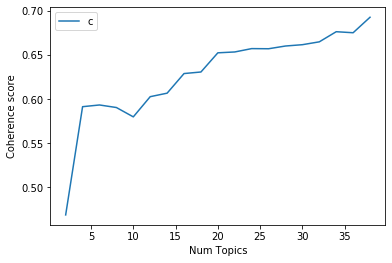

In [429]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [430]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4689
Num Topics = 4  has Coherence Value of 0.5914
Num Topics = 6  has Coherence Value of 0.5933
Num Topics = 8  has Coherence Value of 0.5905
Num Topics = 10  has Coherence Value of 0.5799
Num Topics = 12  has Coherence Value of 0.6027
Num Topics = 14  has Coherence Value of 0.6067
Num Topics = 16  has Coherence Value of 0.6289
Num Topics = 18  has Coherence Value of 0.6307
Num Topics = 20  has Coherence Value of 0.6524
Num Topics = 22  has Coherence Value of 0.6534
Num Topics = 24  has Coherence Value of 0.6571
Num Topics = 26  has Coherence Value of 0.657
Num Topics = 28  has Coherence Value of 0.6601
Num Topics = 30  has Coherence Value of 0.6616
Num Topics = 32  has Coherence Value of 0.6648
Num Topics = 34  has Coherence Value of 0.6763
Num Topics = 36  has Coherence Value of 0.6751
Num Topics = 38  has Coherence Value of 0.6927


Si le score de cohérence semble continuer à augmenter, il peut être plus judicieux de choisir le modèle qui a donné le Coherence Value le plus élevé.

In [431]:
# Select the model and print the topics
optimal_model = model_list[18]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(4,
  '0.532*"election" + 0.048*"issue" + 0.032*"fire" + 0.024*"turkish" + '
  '0.024*"ago" + 0.024*"federal" + 0.016*"terrorist" + 0.016*"term" + '
  '0.016*"check" + 0.016*"suffer"'),
 (23,
  '0.324*"election" + 0.130*"vote" + 0.120*"state" + 0.028*"place" + '
  '0.019*"uncertainty" + 0.019*"art" + 0.019*"votebymail" + 0.019*"month" + '
  '0.019*"big" + 0.009*"scatter"'),
 (2,
  '0.496*"election" + 0.031*"victory" + 0.023*"frustrate" + 0.023*"time" + '
  '0.023*"clear" + 0.015*"head" + 0.015*"clinton" + 0.015*"thing" + '
  '0.015*"donaldtrump" + 0.015*"ill"'),
 (25,
  '0.622*"election" + 0.031*"biden" + 0.024*"expert" + 0.024*"federal" + '
  '0.016*"support" + 0.016*"evil" + 0.016*"media" + 0.016*"green" + '
  '0.016*"dark" + 0.016*"forbid"'),
 (10,
  '0.417*"election" + 0.063*"good" + 0.031*"cast" + 0.024*"sadistic" + '
  '0.024*"break" + 0.024*"autocrat" + 0.024*"steal" + 0.016*"propose" + '
  '0.016*"sick" + 0.016*"american"'),
 (35,
  '0.349*"election" + 0.068*"president" + 0.05

L'une des applications pratiques de la modélisation de sujets est de déterminer le sujet sur lequel porte un document donné.
Pour trouver cela, nous trouvons le numéro de sujet qui a le pourcentage de contribution le plus élevé dans ce document.
La fonction format_topics_sentences () ci-dessous regroupe joliment ces informations dans un tableau présentable.

In [433]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0403,"wave, predict, case, governor, smile, target, supporter, virus, good, grapple","RT Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on November 3. BO…"
1,1,22.0,0.0562,"people, peace, special, opinion, government, rl, qdlmhkc, final, scenario, recognize","Will you strive for justice and peace among all people, and respect the dignity of every human being? #jaxcathedral… https://t.co/QOGajyL5LU"
2,2,0.0,0.0416,"wave, predict, case, governor, smile, target, supporter, virus, good, grapple","Races in 35 Senate seats, all of the House of Representative and 11 state governor are also on the cards on Novembe… https://t.co/MzpU8XY0ut"
3,3,8.0,0.0416,"biden, country, question, debate, business, pay, press, unethical, insist, market",WAKE UP WORLD!!! ARMENIA BOMBED BARDA CITY OF AZERBAIJAN! SIX TIMES!!! SIX! SIX!! IT IS UNACCEPTAB… https://t.co/PlXVfhtIzR
4,4,4.0,0.0632,"election, issue, fire, turkish, ago, federal, terrorist, term, check, suffer","Armenian terrorists fired a rocket at the Azerbaijani city of Barda, according to preliminary repo… https://t.co/Q8kzAunvVD"
5,5,15.0,0.0406,"ballot, mail, late, official, box, choice, drop, safely, comparison, awful",#USA #ElectionDay 2020 #American voters make history in early voting; more than 70 million cast ballots https://t.co/Df2nrtnn6E
6,6,33.0,0.0543,"candidate, run, talk, black, watch, read, feel, leader, bad, uselection","""#Melania #Trump accused Democrats of setting a bad example: #children watching and learning about… https://t.co/IObWV4ZIlB"
7,7,9.0,0.0394,"election, swear, history, terrorist, contest, ivote, communication, private, link, jealous","#USA Read that the Trump campaign site was hacked with a message saying, ""Americans have no choice in election"". Th… https://t.co/sljvcUpNsz"
8,8,32.0,0.0414,"give, political, fast, economic, reach, landslide, democratic, electoral, insid, anti",We all know this man is pure #evil. The #USA should be locking down - to save lives. They should be following the l… https://t.co/E8jEGSSQnE
9,9,17.0,0.1148,"trump, friend, buy, explain, article, medium, change, getanalysis, break, push","RT Is #Trump a friend of the Jews? Protector and patron saint of Israel? Sorry, but I dont buy it. I explain why in two articles pub…"


Parfois, seuls les mots-clés du sujet peuvent ne pas être suffisants pour comprendre en quoi consiste un sujet. Ainsi, pour aider à comprendre le sujet, vous pouvez trouver les documents auxquels un sujet donné a le plus contribué et en déduire le sujet en lisant ce document

In [434]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0949,"wave, predict, case, governor, smile, target, supporter, virus, good, grapple","While Europe grapples its second wave of the pandemic, the US enters its third wave! We are overachievers. 🤦🏼‍♀️… https://t.co/FH3Rq75ATj"
1,1.0,0.0933,"win, accord, corner, back, judge, credibility, succeed, voter, policy, battleground",US Presidential Election is round the corner. Who according to you will succeed in winning? #Trump #JoeBiden #poll… https://t.co/NooVGsu4Ye
2,2.0,0.0592,"election, victory, frustrate, time, clear, head, clinton, thing, donaldtrump, ill",#XiJinping ? The one who #Trump repeatedly asked for help in the #USA election? The one who he praised… https://t.co/2bsbMy7iin
3,3.0,0.0799,"post, past, similar, american, politician, elect, serve, office, accurately, change","RT What if #Sweden used first-past-the-post voting, similar to the #USA? #election #dataviz Source: https://t.co/ljScvRvkO4…"
4,4.0,0.0769,"election, issue, fire, turkish, ago, federal, terrorist, term, check, suffer","Armenian terrorists fired a rocket at the Azerbaijani city of Barda, according to preliminary reports, 21 people we… https://t.co/tGDIgbInch"


La sortie tabulaire ci-dessus comporte le Topic. Il contient le numéro du sujet, les mots-clés et le document le plus représentatif. La colonne Perc_Contribution n'est rien d'autre que le pourcentage de contribution du sujet dans le document donné.

Enfin, nous voulons comprendre le volume et la distribution des sujets afin de juger de l'ampleur des discussions. Le tableau ci-dessous expose ces informations

In [435]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"wave, predict, case, governor, smile, target, supporter, virus, good, grapple",60.0,0.060
1.0,22.0,"people, peace, special, opinion, government, rl, qdlmhkc, final, scenario, recognize",36.0,0.036
2.0,0.0,"wave, predict, case, governor, smile, target, supporter, virus, good, grapple",12.0,0.012
3.0,8.0,"biden, country, question, debate, business, pay, press, unethical, insist, market",23.0,0.023
4.0,4.0,"election, issue, fire, turkish, ago, federal, terrorist, term, check, suffer",16.0,0.016
...,...,...,...,...
995.0,0.0,"wave, predict, case, governor, smile, target, supporter, virus, good, grapple",NaN,NaN
996.0,4.0,"election, issue, fire, turkish, ago, federal, terrorist, term, check, suffer",NaN,NaN
997.0,21.0,"pandemic, world, hand, month, agree, raise, event, patriot, polling, liberal",NaN,NaN
998.0,16.0,"campaign, chief, whitehouse, staff, adviser, include, primary, stop, vp, markmeadow",NaN,NaN


Cette representation contient Le topic dominant, le keywords le plus interessant et le Num_Documents contient le nombre des documents pour chaque Topic 

# Import DataSet qui contient des tweets sur le candidats Biden Haris 

troisièmement on a travaille sur une dataset que je collecte les réponses sur les tweets récents de Biden Haris 

In [453]:
DataFrameBiden.head()

,Text
0,RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…
1,RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…
2,RT @stengel: No Wall. No National Plan to Fight Covid. No Comprehensive Health Care Plan. No Economic Plan. No Climate Change Plan. No Hone…
3,@JoeBiden My President 💙🙏🏾✊🏾🇺🇲 #VoteBidenHarris2020 💙💙🙏🏾🙏🏾✊🏾✊🏾🇺🇲🇺🇲
4,RT @MaisonDeUnicorn: @JoeBiden A real leaders statement. A real leader with a proven track record of having ALL of America's back. Not just…


### Remove emails and newline characters

In [470]:
# Convert DataFrame to list
DataBiden = DataFrameBiden.Text.values.tolist()

# Remove Emails
DataBiden = [re.sub('\S*@\S*\s?', '', tweet) for tweet in DataBiden]

# Remove new line characters
DataBiden = [re.sub('\s+', ' ', tweet) for tweet in DataBiden]

# Remove distracting single quotes
DataBiden = [re.sub("\'", "", tweet) for tweet in DataBiden]

pprint(DataBiden[:3])

['RT No Wall. No National Plan to Fight Covid. No Comprehensive Health Care '
 'Plan. No Economic Plan. No Climate Change Plan. No Hone…',
 'RT No Wall. No National Plan to Fight Covid. No Comprehensive Health Care '
 'Plan. No Economic Plan. No Climate Change Plan. No Hone…',
 'RT No Wall. No National Plan to Fight Covid. No Comprehensive Health Care '
 'Plan. No Economic Plan. No Climate Change Plan. No Hone…']


Après avoir supprimé les e-mails et les espaces supplémentaires, le texte semble toujours désordonné. Il n'est pas prêt pour le LDA à consommer. Vous devez décomposer chaque phrase en une liste de mots grâce à la tokenisation, tout en clarifiant tout le texte en désordre dans le processus.

In [456]:
def TweetsToWords(tweets):
    for tweet in tweets:
        yield(gensim.utils.simple_preprocess(str(tweet), deacc=True))  # deacc=True removes punctuations

DataBidenWords = list(TweetsToWords(DataBiden))

print(DataBidenWords[:1])

[['rt', 'no', 'wall', 'no', 'national', 'plan', 'to', 'fight', 'covid', 'no', 'comprehensive', 'health', 'care', 'plan', 'no', 'economic', 'plan', 'no', 'climate', 'change', 'plan', 'no', 'hone']]


Le modèle Phrases de Gensim peut créer et implémenter les bigrammes, trigrammes, quadgrammes et plus encore. Les deux arguments importants de Phrases sont min_count et threshold. Plus les valeurs de ces paramètres sont élevées, plus il est difficile de combiner les mots en bigrammes.

In [457]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(DataBidenWords, min_count=1, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[DataBidenWords], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[DataBidenWords[100]]])

['omg', 'this_is', 'everything', 'we_need', 'today', 'its', 'dance', 'revolution', 'yall', 'see', 'this', 'https_co', 'eiypn', 'ydq']


Le modèle des bigrammes est prêt. Définissons les fonctions pour supprimer les mots vides, créer des bigrammes et de la lemmatisation et les appeler séquentiellement.

In [458]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def RemoveStopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

def MakeBigrams(tweets):
    return [bigram_mod[tweet] for tweet in tweets]

def MakeTrigrams(tweets):
    return [trigram_mod[bigram_mod[tweet]] for tweet in tweets]

def Lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    TweetsOut = []
    for sent in texts:
        tweet = nlp(" ".join(sent)) 
        TweetsOut.append([token.lemma_ for token in tweet if token.pos_ in allowed_postags])
    return TweetsOut

In [459]:
# Remove Stop Words
DataBidenWordsNoStops = RemoveStopwords(DataBidenWords)

# Form Bigrams
DataBidenWordsBigrams = MakeBigrams(DataBidenWordsNoStops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
DataBidenLemmatized = Lemmatization(DataBidenWordsBigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(DataBidenLemmatized[:10])

[['governor', 'also', 'card'], ['strive', 'justice', 'peace', 'people', 'respect', 'dignity', 'human', 'jaxcathedral', 'qogajyl'], ['governor', 'also', 'card', 'novembe'], ['bomb', 'time'], ['armenian', 'terrorist', 'fire', 'rocket', 'accord'], ['voter', 'make', 'history', 'early', 'voting', 'cast', 'ballot'], ['set', 'bad', 'example', 'child', 'watch', 'learn'], ['trump', 'campaign', 'site', 'hack', 'message', 'say', 'election'], ['know', 'pure', 'evil', 'lock', 'save', 'life', 'follow'], ['trump', 'friend', 'buy', 'explain', 'article']]


Créer le dictionnaire et le corpus nécessaires à la Topic Modeling
Les deux principales entrées du topic model LDA sont le dictionnaire (id2word) et le corpus.

In [460]:
# Create Dictionary
id2word = corpora.Dictionary(DataBidenLemmatized)

# Create Corpus
tweets = DataBidenLemmatized

# Term Document Frequency
DataBidenCorpus = [id2word.doc2bow(tweet) for tweet in tweets]

# View
print(DataBidenCorpus[:10])

[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(0, 1), (1, 1), (2, 1), (12, 1)], [(13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(39, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]


In [461]:
# Format de corpus lisible(terme-fréquence)
[[(id2word[id], freq) for id, freq in cp] for cp in DataBidenCorpus[:10]]

[[('also', 1), ('card', 1), ('governor', 1)],
 [('dignity', 1),
  ('human', 1),
  ('jaxcathedral', 1),
  ('justice', 1),
  ('peace', 1),
  ('people', 1),
  ('qogajyl', 1),
  ('respect', 1),
  ('strive', 1)],
 [('also', 1), ('card', 1), ('governor', 1), ('novembe', 1)],
 [('bomb', 1), ('time', 1)],
 [('accord', 1),
  ('armenian', 1),
  ('fire', 1),
  ('rocket', 1),
  ('terrorist', 1)],
 [('ballot', 1),
  ('cast', 1),
  ('early', 1),
  ('history', 1),
  ('make', 1),
  ('voter', 1),
  ('voting', 1)],
 [('bad', 1),
  ('child', 1),
  ('example', 1),
  ('learn', 1),
  ('set', 1),
  ('watch', 1)],
 [('campaign', 1),
  ('election', 1),
  ('hack', 1),
  ('message', 1),
  ('say', 1),
  ('site', 1),
  ('trump', 1)],
 [('evil', 1),
  ('follow', 1),
  ('know', 1),
  ('life', 1),
  ('lock', 1),
  ('pure', 1),
  ('save', 1)],
 [('trump', 1), ('article', 1), ('buy', 1), ('explain', 1), ('friend', 1)]]

Nous avons tout ce qu'il faut pour former le modèle LDA. En plus du corpus et du dictionnaire, vous devez également fournir le nombre de sujets.

In [462]:
# Build LDA model
LdaModel = gensim.models.ldamodel.LdaModel(corpus=DataBidenCorpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Le modèle LDA ci-dessus est construit avec 20 sujets différents où chaque sujet est une combinaison de mots-clés et chaque mot-clé apporte un certain poids au sujet.
Vous pouvez voir les mots-clés pour chaque sujet et la pondération (importance) de chaque mot-clé en utilisant lda_model.print_topics () comme indiqué ci-dessous.

In [463]:
pprint(LdaModel.print_topics())
DataBidenLda = LdaModel[DataBidenCorpus]

[(0,
  '0.161*"stay" + 0.102*"election" + 0.083*"safe" + 0.079*"dear" + '
  '0.079*"excuse" + 0.079*"happy" + 0.079*"together" + 0.016*"decide" + '
  '0.013*"wave" + 0.008*"good"'),
 (1,
  '0.044*"poll" + 0.033*"big" + 0.022*"praise" + 0.022*"everywhere" + '
  '0.022*"reason" + 0.021*"prior" + 0.020*"vote" + 0.017*"democratic" + '
  '0.017*"break" + 0.017*"whitehouse"'),
 (2,
  '0.034*"country" + 0.025*"want" + 0.022*"leadership" + 0.018*"lose" + '
  '0.016*"long" + 0.016*"failure" + 0.016*"go" + 0.016*"could" + 0.016*"proud" '
  '+ 0.013*"election"'),
 (3,
  '0.062*"first" + 0.060*"vote" + 0.056*"use" + 0.055*"similar" + 0.053*"post" '
  '+ 0.049*"past" + 0.031*"election" + 0.028*"day" + 0.013*"state" + '
  '0.010*"competitive"'),
 (4,
  '0.106*"election" + 0.034*"never" + 0.032*"many" + 0.027*"may" + '
  '0.027*"scepticism" + 0.027*"harbour" + 0.027*"probably" + 0.021*"vote" + '
  '0.019*"win" + 0.016*"credibility"'),
 (5,
  '0.084*"election" + 0.081*"conservative" + 0.059*"come" + 0

Le sujet 7 est représenté par '0.115*"election" + 0.030*"trump" + 0.024*"biden" + 0.021*"say" + ''0.013*"politic" + 0.011*"next" 
+0.011*"result" + 0.011*"show" + ''0.011*"run" + 0.011*"recognize"'),
Cela signifie que les 10 principaux mots clés qui contribuent à ce sujet sont: "election", "trump", "biden", etc.
En regardant ces mots clés, pouvez-vous deviner ce que pourrait être ce sujet? Vous pouvez résumer cela par «Election(trump, biden)»

La Perplexity du modèle et la Coherence du sujet fournissent une mesure pratique pour juger de la qualité d'un modèle de sujet donné.

In [464]:
# Compute Perplexity
print('\nPerplexity: ', LdaModel.log_perplexity(DataBidenCorpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
CoherenceModelLda = CoherenceModel(model=LdaModel, texts=DataBidenLemmatized, dictionary=id2word, coherence='c_v')
CoherenceLda = CoherenceModelLda.get_coherence()
print('\nCoherence Score: ', CoherenceLda)


Perplexity:  -6.115673040051403

Coherence Score:  0.4273445626861359


Maintenant que le modèle LDA est construit, l'étape suivante consiste à examiner les rubriques produites et les mots-clés associés. Il n’existe pas de meilleur outil que le graphique interactif du package pyLDAvis.

In [465]:
# Visualize the topics
pyLDAvis.enable_notebook()
TopicModelGraph = pyLDAvis.gensim.prepare(LdaModel, DataBidenCorpus, id2word)
TopicModelGraph

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.266990 -0.039577       1        1  13.459584
0      0.153796 -0.195278       2        1   9.107176
7      0.068351  0.188100       3        1   8.440454
17     0.045297 -0.031316       4        1   6.536354
13     0.077777  0.126707       5        1   5.845461
16     0.103423  0.041376       6        1   5.416794
4      0.044636  0.040179       7        1   5.202856
15     0.029162  0.027082       8        1   4.900300
5      0.017861 -0.119928       9        1   4.594161
19     0.046469  0.028947      10        1   4.207300
11    -0.013938 -0.043169      11        1   4.179679
3     -0.034836  0.130226      12        1   4.159202
18    -0.000394 -0.082275      13        1   3.816040
9     -0.151565 -0.069022      14        1   3.409770
10    -0.075946  0.051740      15        1   3.230327
12    -0.076821  0.091080      16        1   3.208692
6     -0.126777 -0.047318      17        1   2.937187
14    -0.118905 -0.034530      18        1   2.800622
2     -0.117034 -0.056798      19        1   2.354949
1     -0.137544 -0.006226      20        1   2.193087, topic_info=             Term        Freq       Total Category  logprob  loglift
181  presidential  177.000000  177.000000  Default  30.0000  30.0000
60           vote  208.000000  208.000000  Default  29.0000  29.0000
162          stay   84.000000   84.000000  Default  28.0000  28.0000
406   donaldtrump   76.000000   76.000000  Default  27.0000  27.0000
147          next   70.000000   70.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
34       election    0.739879  520.737854  Topic20  -5.1326  -2.7367
25          voter    0.728771   28.483921  Topic20  -5.1477   0.1541
145         proud    0.728768    5.255996  Topic20  -5.1477   1.8441
371         group    0.722682    2.287654  Topic20  -5.1561   2.6675
834         great    0.722682    3.974002  Topic20  -5.1561   2.1153

[1008 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1118      4  0.617199       aazza
208       5  0.625169     abdrqar
484       3  0.719527        able
484      15  0.079947        able
484      16  0.159895        able
...     ...       ...         ...
274       5  0.823022        year
1076      1  0.598983      yedcmw
750       2  0.606114         yen
297      18  0.654320  ymhgzebvso
320      17  0.642443        yout

[1411 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 8, 18, 14, 17, 5, 16, 6, 20, 12, 4, 19, 10, 11, 13, 7, 15, 3, 2])

Chaque bulle sur le graphique de gauche représente un sujet. Plus la bulle est grande, plus ce sujet est répandu.
D'accord, si vous déplacez le curseur sur l'une des bulles, les mots et les barres sur le côté droit seront mis à jour. 
Ces mots sont les principaux mots-clés qui forment le sujet sélectionné par exemple Topic 1: contient les mots presidential, election, DonaldTrump....
Nous avons réussi à créer un beau modèle de Topic

Premierment on vu la version intégrée de Gensim de l'algorithme LDA, maintement on va améliorer notre modele par La version de Mallet, cependant, donne souvent une meilleure qualité des Topic.

In [466]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:\\users\\asus\\mallet-2.0.8'

MalletPath = 'C:\\users\\asus\\mallet-2.0.8\\bin\\mallet'
LdaMallet = LdaMallet(MalletPath, corpus=DataBidenCorpus, num_topics=20, id2word=id2word)

In [467]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
CoherenceModelLdaMallet = CoherenceModel(model=LdaMallet, texts=DataBidenLemmatized, dictionary=id2word, coherence='c_v')
CoherenceLdaMallet = CoherenceModelLdaMallet.get_coherence()
print('\nCoherence Score: ', CoherenceLdaMallet)

[(12,
  [('vote', 0.5287769784172662),
   ('early', 0.039568345323741004),
   ('cast', 0.03237410071942446),
   ('wait', 0.025179856115107913),
   ('citizen', 0.02158273381294964),
   ('step', 0.017985611510791366),
   ('popular', 0.017985611510791366),
   ('ready', 0.014388489208633094),
   ('person', 0.01079136690647482),
   ('share', 0.01079136690647482)]),
 (0,
  [('day', 0.23076923076923078),
   ('people', 0.11740890688259109),
   ('show', 0.044534412955465584),
   ('follow', 0.04048582995951417),
   ('big', 0.03643724696356275),
   ('support', 0.02834008097165992),
   ('back', 0.024291497975708502),
   ('voting', 0.024291497975708502),
   ('justice', 0.024291497975708502),
   ('opinion', 0.024291497975708502)]),
 (14,
  [('election', 0.36475409836065575),
   ('presidential', 0.12704918032786885),
   ('voteearly', 0.06147540983606557),
   ('vote', 0.036885245901639344),
   ('final', 0.03278688524590164),
   ('choose', 0.01639344262295082),
   ('lie', 0.012295081967213115),
   ('pr

En changeant simplement l'algorithme LDA, nous avons augmenté le score de cohérence de 0,42 à 0,68.

In [468]:
def ComputeCoherenceValues(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    CoherenceValues = []
    ModelList = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(MalletPath, corpus=corpus, num_topics=num_topics, id2word=id2word)
        ModelList.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        CoherenceValues.append(coherencemodel.get_coherence())

    return ModelList, CoherenceValues

In [469]:
# Can take a long time to run.
ModelList, CoherenceValues = ComputeCoherenceValues(dictionary=id2word, corpus=DataBidenCorpus, texts=DataBidenLemmatized, start=2, limit=40, step=2)

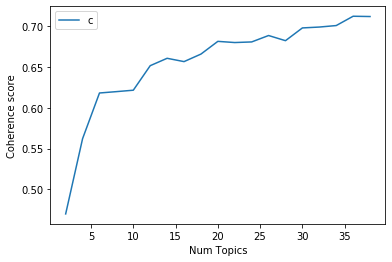

In [471]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, CoherenceValues)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [472]:
# Print the coherence scores
for m, cv in zip(x, CoherenceValues):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4699
Num Topics = 4  has Coherence Value of 0.562
Num Topics = 6  has Coherence Value of 0.618
Num Topics = 8  has Coherence Value of 0.6197
Num Topics = 10  has Coherence Value of 0.6214
Num Topics = 12  has Coherence Value of 0.6515
Num Topics = 14  has Coherence Value of 0.6605
Num Topics = 16  has Coherence Value of 0.6564
Num Topics = 18  has Coherence Value of 0.6657
Num Topics = 20  has Coherence Value of 0.6812
Num Topics = 22  has Coherence Value of 0.6798
Num Topics = 24  has Coherence Value of 0.6805
Num Topics = 26  has Coherence Value of 0.6884
Num Topics = 28  has Coherence Value of 0.6821
Num Topics = 30  has Coherence Value of 0.6977
Num Topics = 32  has Coherence Value of 0.6988
Num Topics = 34  has Coherence Value of 0.7006
Num Topics = 36  has Coherence Value of 0.712
Num Topics = 38  has Coherence Value of 0.7117


Si le score de cohérence semble continuer à augmenter, il peut être plus judicieux de choisir le modèle qui a donné le Coherence Value le plus élevé.

In [473]:
# Select the model and print the topics
OptimalModel = model_list[18]
ModelTopics = OptimalModel.show_topics(formatted=False)
pprint(OptimalModel.print_topics(num_words=10))

[(32,
  '0.158*"give" + 0.130*"political" + 0.073*"fast" + 0.068*"economic" + '
  '0.068*"reach" + 0.056*"landslide" + 0.056*"democratic" + 0.056*"electoral" '
  '+ 0.045*"insid" + 0.034*"anti"'),
 (23,
  '0.324*"election" + 0.130*"vote" + 0.120*"state" + 0.028*"place" + '
  '0.019*"uncertainty" + 0.019*"art" + 0.019*"votebymail" + 0.019*"month" + '
  '0.019*"big" + 0.009*"scatter"'),
 (18,
  '0.229*"make" + 0.112*"stimulus" + 0.090*"pass" + 0.085*"senator" + '
  '0.085*"package" + 0.085*"logistic" + 0.085*"depart" + 0.085*"fiscal" + '
  '0.011*"easy" + 0.005*"fracke"'),
 (16,
  '0.099*"campaign" + 0.050*"chief" + 0.050*"whitehouse" + 0.050*"staff" + '
  '0.043*"adviser" + 0.043*"include" + 0.028*"primary" + 0.028*"stop" + '
  '0.021*"vp" + 0.021*"markmeadow"'),
 (19,
  '0.318*"stay" + 0.166*"safe" + 0.156*"happy" + 0.156*"excuse" + 0.156*"dear" '
  '+ 0.003*"tailbone" + 0.003*"fnxh" + 0.003*"pose" + 0.003*"sound" + '
  '0.003*"influence"'),
 (13,
  '0.437*"vote" + 0.104*"decide" + 0.0

La modélisation de Topic est de déterminer le sujet sur lequel porte un document donné.
Pour trouver cela, nous trouvons le numéro de sujet qui a le pourcentage de contribution le plus élevé dans ce document
11,
  '0.270*"trump" + 0.064*"friend" + 0.064*"buy" + 0.050*"explain" + '
  '0.050*"article" + 0.035*"swear" + 0.028*"uselection" + 0.028*"pub" + '
  '0.021*"country" + 0.014*"suffer"'